In [1]:
import sys

sys.path.append("..")

In [2]:
from data.dataloader import LowLightDataModule
from model.blocks.enhancer import Enhancer
from utils.utils import show_batch

In [3]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=128,
    batch_size=1,
    num_workers=4,
)

data_module.setup(stage="fit")

In [4]:
train_dataloader = data_module.train_dataloader()

In [5]:
train_low, train_high = next(iter(train_dataloader))

In [6]:
train_low = train_low.cuda()

In [7]:
enhancer = Enhancer(
    channels=3,
    kernel_size=15,
    sigma=5,
    embed_dim=16,
    num_heads=1,
    mlp_ratio=1,
    num_resolution=1,
    dropout_ratio=0.2,
)

In [8]:
train_low = train_low.cuda()
enhancer = enhancer.cuda()

In [9]:
result = enhancer(train_low)

torch.Size([1, 3, 128, 128])


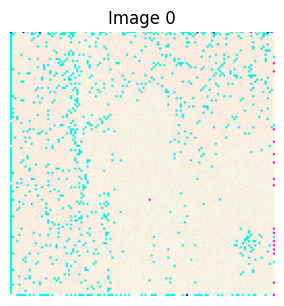

In [10]:
print(result.shape)
show_batch(images=result)